# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [88]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import plotly_express as px

In [3]:
# Example importing the CSV here
url='https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'
df=pd.read_csv(url)
df.shape

(48895, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes == 'object']

print("Numerical variables:", num_vars)
print("Categorical variables:", cat_vars)


Numerical variables: Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')
Categorical variables: Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')


In [6]:
df[num_vars].isnull().sum().sort_values(ascending=False)/len(df)

reviews_per_month                 0.205583
id                                0.000000
host_id                           0.000000
latitude                          0.000000
longitude                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [7]:
df[cat_vars].isnull().sum().sort_values(ascending=False)/len(df)

last_review            0.205583
host_name              0.000429
name                   0.000327
neighbourhood_group    0.000000
neighbourhood          0.000000
room_type              0.000000
dtype: float64

The data frame has 16 variables and there are three variables types: int64, object and float64.
Four variables have missing values (one numerical and three categorical).  For two variables the missing values represent about 20% of the total vaues (last_review and reviews_per_month). For host_name and name, the missing values are not significant. 

I decided not to eliminate variables with missing values because I do not known if they could be important or not for model. After knowing the model, I could impute the mean for numerical varibles or the more frequent value for the categorical ones. 

In [8]:
df.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
19081,15160268,Elegant Ground Floor Garden Apartment,345252,Thomas,Brooklyn,Crown Heights,40.67843,-73.96385,Entire home/apt,120,5,3,2016-10-21,0.09,3,0
28639,22175113,Cozy Room in Brooklyn- 2 blocks from subway!,9104749,Bibi,Brooklyn,Bedford-Stuyvesant,40.69134,-73.95551,Private room,50,3,15,2018-05-30,0.80,1,0
25971,20741563,Back to the 90s Bedroom,38561955,Alex,Brooklyn,Bedford-Stuyvesant,40.68566,-73.92552,Private room,48,1,2,2017-09-30,0.09,1,0
19395,15478604,Guest suite in owner-occupied private residence,36861300,Martin,Brooklyn,Bushwick,40.69980,-73.92167,Entire home/apt,70,2,72,2019-06-20,2.20,1,146
15238,12188651,Spacious home in heart of NYC,6997786,Mara,Manhattan,Chelsea,40.74369,-73.99571,Entire home/apt,225,2,5,2016-10-09,0.14,1,0
19889,15939098,"Sunny, Quiet Urban Oasis w/ Elevator! Near Sub...",10703290,Mike,Manhattan,Upper East Side,40.77221,-73.94819,Entire home/apt,300,2,19,2019-05-21,0.60,3,179
25923,20707833,"Charming, Spacious Private Room in Harlem, NYC",148241246,Ella Jane,Manhattan,Harlem,40.82444,-73.95112,Private room,65,3,69,2019-07-01,3.16,1,57
35341,28033814,Large bright bedroom near Bushwick,199203455,Kendra,Queens,Ridgewood,40.70476,-73.91111,Private room,75,1,3,2018-09-08,0.29,1,0
38921,30440488,Gorgeous Private Bedroom Madison 2L-4,226410657,Nina,Brooklyn,Bedford-Stuyvesant,40.68561,-73.93085,Private room,42,30,1,2019-01-26,0.18,27,311
5550,4037522,"Cozy, Safe & Clean room in Astoria",608396,Kiara,Queens,Astoria,40.76269,-73.90816,Private room,99,1,15,2019-02-16,0.26,1,322


Change some variables types to the corrects one:

In [9]:
df=df.astype({'name':'str','host_name':'str','neighbourhood_group':'category','neighbourhood':'category','room_type':'category'})
df['last_review'] = pd.to_datetime(df['last_review'], format="%Y/%m/%d")
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                     category
neighbourhood                           category
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

some statitical information:

In [10]:
round(df.describe())

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0,38843.0,48895.0,48895.0
mean,19017143.0,67620011.0,41.0,-74.0,153.0,7.0,23.0,1.0,7.0,113.0
std,10983108.0,78610967.0,0.0,0.0,240.0,21.0,45.0,2.0,33.0,132.0
min,2539.0,2438.0,40.0,-74.0,0.0,1.0,0.0,0.0,1.0,0.0
25%,9471945.0,7822033.0,41.0,-74.0,69.0,1.0,1.0,0.0,1.0,0.0
50%,19677284.0,30793816.0,41.0,-74.0,106.0,3.0,5.0,1.0,1.0,45.0
75%,29152178.0,107434423.0,41.0,-74.0,175.0,5.0,24.0,2.0,2.0,227.0
max,36487245.0,274321313.0,41.0,-74.0,10000.0,1250.0,629.0,58.0,327.0,365.0


Variable analysis:

the latitude and logitude are ok, they are for the same city so the mean is the same as the max and min, etc.

price: it seems that there are outliers, because the maximum value is 10000 and the 3th quartile is 175.

minimum_nights: same happens in this variable, the maximum value does not seems to be possible (1250) given than the 3th quartile is 5.

for the number of reviews and reviews per month, there are some extreme values, much bigger than the 3th quantile.

calculated host listing count: I interpreted that this variable as the number of properties that has the same host. One host has 327 properties. On average each host has seven properties.

availability 365: it seems that AIRBNB is not the right platform to rent a room/property for a full year, but it seems is possible because the max for this variables is 365.

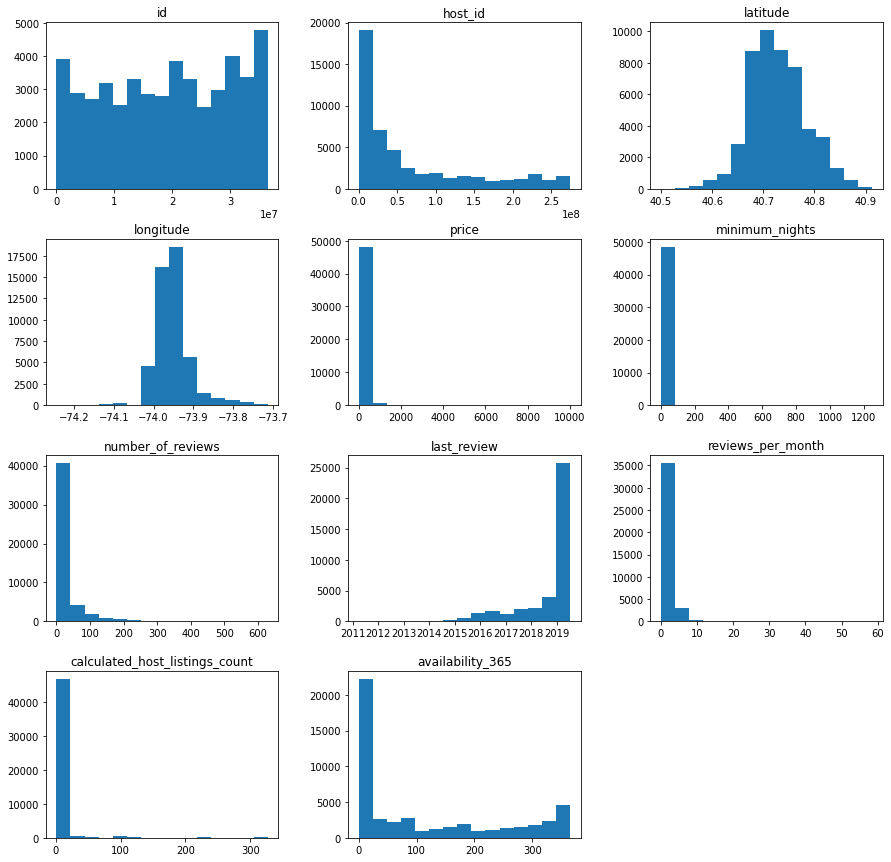

In [11]:
df.hist(bins=15,figsize=(15,15),grid=False);

In [12]:
df.groupby('neighbourhood_group').size().reset_index(name='Number or properties').sort_values(by='Number or properties', ascending=False).assign(Percentage_total=lambda x: round(x['Number or properties']/sum(x['Number or properties'])*100,2))

,neighbourhood_group,Number or properties,Percentage_total
2,Manhattan,21661,44.30
1,Brooklyn,20104,41.12
3,Queens,5666,11.59
0,Bronx,1091,2.23
4,Staten Island,373,0.76


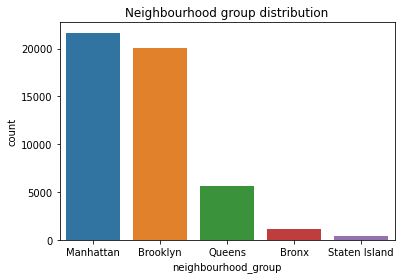

In [13]:
plot=sns.countplot(x='neighbourhood_group',data=df,order = df['neighbourhood_group'].value_counts().index).set(title='Neighbourhood group distribution')
plt.show()


The neighbourhood group with more properties is Manhattan, represent 44.3% of all properties. Is followed by Brooklyn with 41.1%.

In [14]:
df['neighbourhood'].unique()

['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem', ..., 'Bull's Head', 'New Dorp', 'Rossville', 'Breezy Point', 'Willowbrook']
Length: 221
Categories (221, object): ['Allerton', 'Arden Heights', 'Arrochar', 'Arverne', ..., 'Woodhaven', 'Woodlawn', 'Woodrow', 'Woodside']

There are 221 differentes neighbourhoods.

In [15]:
table=df.groupby(['neighbourhood', 'neighbourhood_group']).size().reset_index(name='Number or properties').sort_values(by=['Number or properties'], ascending=False).assign(Percentage_total=lambda x: round(x['Number or properties']/sum(x['Number or properties'])*100,2))
table.head(15)

,neighbourhood,neighbourhood_group,Number or properties,Percentage_total
1071,Williamsburg,Brooklyn,3920,8.02
66,Bedford-Stuyvesant,Brooklyn,3714,7.60
472,Harlem,Manhattan,2658,5.44
141,Bushwick,Brooklyn,2465,5.04
1012,Upper West Side,Manhattan,1971,4.03
477,Hell's Kitchen,Manhattan,1958,4.00
322,East Village,Manhattan,1853,3.79
1007,Upper East Side,Manhattan,1798,3.68
256,Crown Heights,Brooklyn,1564,3.20
637,Midtown,Manhattan,1545,3.16


Altought the neighbourhood group with more properties is Manhattan, the neighbourhood with more properties is not located there (is in Brooklyn). Williamsburg represents 8.02% of all properties.

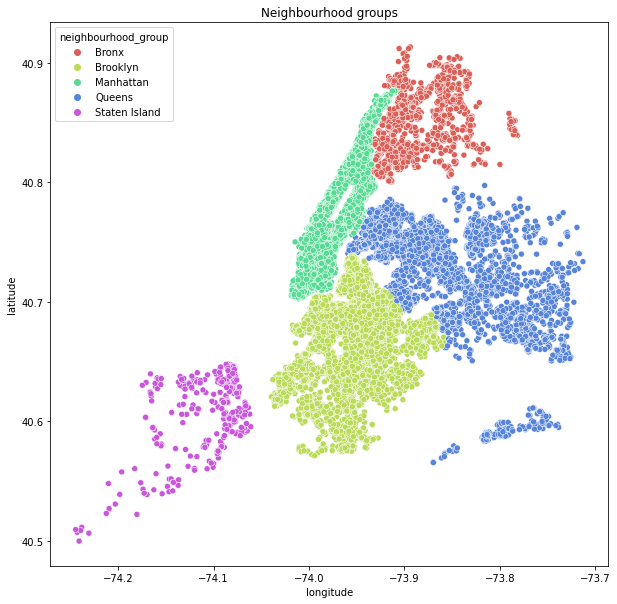

In [16]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['neighbourhood_group'], palette='hls')
plt.title('Neighbourhood groups')
plt.show()

In [17]:
df.groupby('room_type').size().reset_index(name='Number or properties').sort_values(by='Number or properties', ascending=False).assign(Percentage_total=lambda x: round(x['Number or properties']/sum(x['Number or properties'])*100,2))

,room_type,Number or properties,Percentage_total
0,Entire home/apt,25409,51.97
1,Private room,22326,45.66
2,Shared room,1160,2.37


Regarding the type of room, 52% are the entire home/apt, 46% are private rooms and 2% are shared rooms.

Where are the most expensive properties?

In [18]:
df.groupby('neighbourhood_group')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


The most expensive properties are located in Manhattan (mean=196, meadian=150) and the chepeast are located in the Bronx (mean=87, median=65).

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

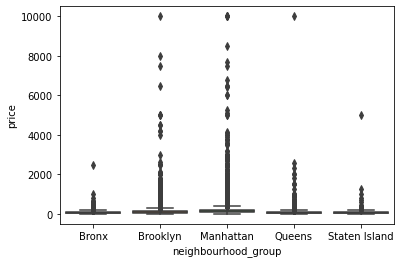

In [19]:
(x='neighbourhood_group', y='price', data=df)

In order to make a violin plot I will eliminate some extreme values of the prices (keep the prices that are lower than the Manhattan 75 quartile).

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

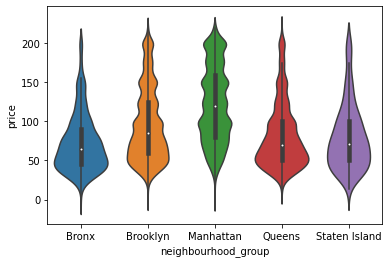

In [20]:
sns.violinplot(x='neighbourhood_group', y='price', data=df[df['price']<220])

Is there any relation between the price and the type of room?

<AxesSubplot:xlabel='room_type', ylabel='price'>

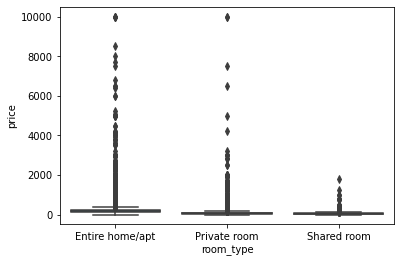

In [21]:
sns.boxplot(x='room_type', y='price', data=df)

The most expensive type of rooms are the entire home/apt, the cheaper are the shared rooms.

In [22]:
df.groupby(['neighbourhood_group','room_type'])['price'].describe()

count        mean         std   min  \
neighbourhood_group room_type                                                
Bronx               Entire home/apt    379.0  127.506596   95.027102  28.0   
                    Private room       652.0   66.788344  107.009071   0.0   
                    Shared room         60.0   59.800000  101.798871  20.0   
Brooklyn            Entire home/apt   9559.0  178.327545  226.415825   0.0   
                    Private room     10132.0   76.500099  124.713499   0.0   
                    Shared room        413.0   50.527845   53.444485   0.0   
Manhattan           Entire home/apt  13199.0  249.239109  331.830132   0.0   
                    Private room      7982.0  116.776622  190.191318  10.0   
                    Shared room        480.0   88.977083   92.416534  10.0   
Queens              Entire home/apt   2096.0  147.050573  129.383208  10.0   
                    Private room      3372.0   71.762456  180.506756  10.0   
                    Shared room        198.0   69.020202  171.000607  11.0   
Staten Island       Entire home/apt    176.0  173.846591  394.600216  48.0   
                    Private room       188.0   62.292553   36.138245  20.0   
                    Shared room          9.0   57.444444   45.119594  13.0   

                                       25%    50%     75%      max  
neighbourhood_group room_type                                       
Bronx               Entire home/apt   80.0  100.0  140.00   1000.0  
                    Private room      40.0   53.5   70.00   2500.0  
                    Shared room       28.0   40.0   55.50    800.0  
Brooklyn            Entire home/apt  105.0  145.0  199.00  10000.0  
                    Private room      50.0   65.0   80.00   7500.0  
                    Shared room       30.0   36.0   50.00    725.0  
Manhattan           Entire home/apt  142.5  191.0  259.00  10000.0  
                    Private room      68.0   90.0  120.00   9999.0  
                    Shared room       49.0   69.0   89.25   1000.0  
Queens              Entire home/apt   90.0  120.0  168.25   2600.0  
                    Private room      47.0   60.0   75.00  10000.0  
                    Shared room       30.0   37.0   54.25   1800.0  
Staten Island       Entire home/apt   75.0  100.0  151.25   5000.0  
                    Private room      40.0   50.0   75.00    300.0  
                    Shared room       29.0   30.0   75.00    150.0

The majority of the combinations of neighbourhood and room type have a positive distribution (mean>median).
In general, the interquartile range is bigger for the entire home/app, followed by private room and the shared room. This is not the case for the shared room in Staten Island, where the IQ range is bigger than the private room. 
In addition, there are some inconsistencies with the lowest prices, for example in Queen the lower price is the Private room rahter than the shared room. Also in Queen seems to be a typo, the maximum price of the private room is much bigger than the other types of rooms.


In [23]:
df_mean_price=df.groupby(['neighbourhood_group','room_type'])['price'].mean()

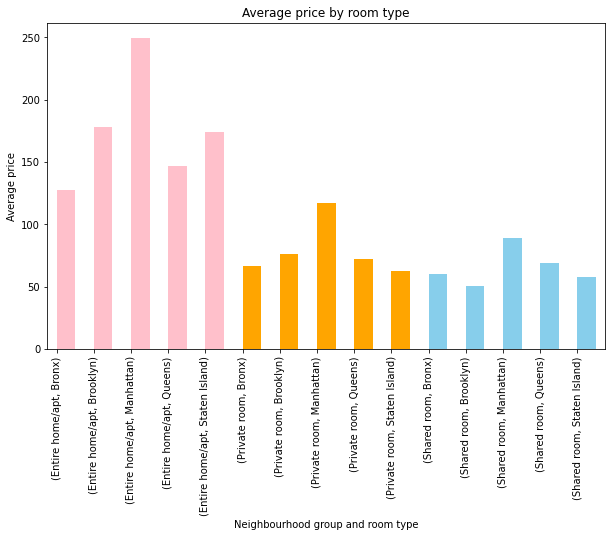

In [24]:
df_price=df.groupby(['room_type','neighbourhood_group'])['price'].mean()
plt.figure(figsize=(10,6))
df_price.plot(kind='bar',width=0.5, align='edge',color=[ 'pink', 'pink', 'pink', 'pink', 'pink', 'orange', 'orange', 'orange','orange','orange','skyblue','skyblue','skyblue','skyblue','skyblue'])
plt.title('Average price by room type')
plt.xlabel('Neighbourhood group and room type')
plt.ylabel('Average price')
plt.show()

The average price in the shared room is similar in all the neighbourhood groups. 

For the case of private room all have the same average price, except from the Manhattan. 

In the case of the entire home/apt. the dispersion is bigger compared with the other types.

How is distributed the most expensive properties in the map?

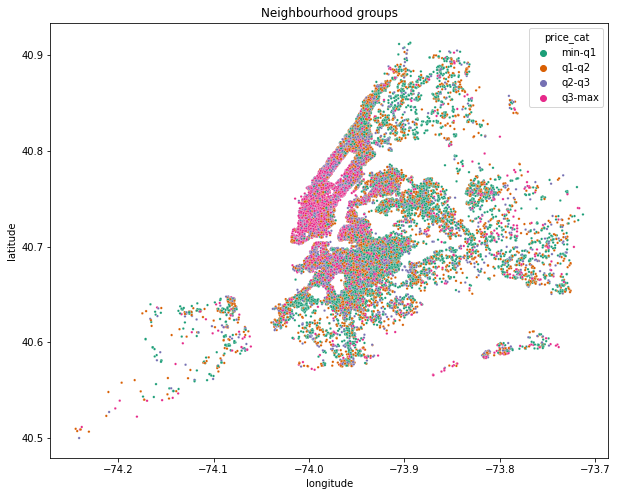

In [25]:
q1=df['price'].quantile(q=0.25)
q2=df['price'].quantile(q=0.5)
q3=df['price'].quantile(q=0.75)

def category(price):
  if price <= q1:
    return 'min-q1'
  elif price<= q2:
    return 'q1-q2'
  elif price<= q3:
    return 'q2-q3'
  else:
    return 'q3-max'

df['price_cat']=df['price'].apply(category).astype('category')

plt.figure(figsize=(10,8))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['price_cat'],s=6, hue_order=['min-q1','q1-q2','q2-q3','q3-max'], palette='Dark2')
plt.title('Neighbourhood groups')
plt.show()

The most expensive rooms are the pink dotts, and are most located in Manhattan. 
Manhattan's outer circle has chepear properties where to stay.


chequear nulos y na--quizas esto deba de hacerlo antes q nada, conviene realizar algun tipo de imputación?
El tema de si algun id esta repetido o no y toda esa discusión. 
Fijarme si queda alguna variable sin analizar, falta la de 365Ñ que se podría decir

id unicos
?
la otra cat variable q no analice es last review.
host con muchos reviews?? tienen muchas propiedades?
precio promedio en los distintos barrios, donde 

In [27]:
print('Number of different hosts:', df['host_id'].nunique())

Number of different hosts: 37457


In [28]:
print('Total rooms offered in the database: ', df['room_type'].value_counts().sum())
print('Different types of rooms:')
df['room_type'].value_counts()


Total rooms offered in the database:  48895
Different types of rooms:


Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In the Dataframe there are 48895 offered rooms and only 37457 host --> there are some hosts with more than one property.
Also the most offered room type is th entire home/apt.

In [39]:
df_hn=round(df.groupby(['host_id','neighbourhood_group'])[['number_of_reviews','id','price','calculated_host_listings_count']].agg({'id':pd.Series.nunique,'number_of_reviews':['sum','mean'],'price':'mean', 'calculated_host_listings_count':'count'}).sort_values(by=('id','nunique'),ascending=False))[0:10] # Top 10 host
df_hn

id number_of_reviews       price  \
                              nunique               sum mean   mean   
host_id   neighbourhood_group                                         
219517861 Manhattan             327.0              1281  4.0  253.0   
107434423 Manhattan             230.0                29  0.0  303.0   
30283594  Manhattan             121.0                65  1.0  278.0   
12243051  Manhattan              96.0                43  0.0  213.0   
16098958  Manhattan              96.0               138  1.0  209.0   
61391963  Manhattan              91.0               417  5.0  146.0   
22541573  Manhattan              86.0                54  1.0  216.0   
137358866 Queens                 79.0                54  1.0   44.0   
200380610 Manhattan              65.0                 1  0.0  290.0   
1475015   Manhattan              52.0               162  3.0  103.0   

                              calculated_host_listings_count  
                                                       count  
host_id   neighbourhood_group                                 
219517861 Manhattan                                      327  
107434423 Manhattan                                      230  
30283594  Manhattan                                      121  
12243051  Manhattan                                       96  
16098958  Manhattan                                       96  
61391963  Manhattan                                       91  
22541573  Manhattan                                       86  
137358866 Queens                                          79  
200380610 Manhattan                                       65  
1475015   Manhattan                                       52

As I previous mentioned, the calculated_host_listing_count is the number properties that one host has. In the table above, the count of properties for the same hosr is equal to the calculated_host_listing_count.

In [33]:
df_nei=df.groupby(['neighbourhood_group','neighbourhood']).agg({'price':'mean'}).sort_values(by=['neighbourhood_group','price'],ascending=False).dropna()

In [34]:
df_nei.reset_index(inplace=True)

In the two following tables are presented the higher and lower prices classified by neighbourhood group.

In [35]:
for barrio in list(df_nei.neighbourhood_group.unique()) :
    display(df_nei[df_nei['neighbourhood_group'] == barrio].head(3))

,neighbourhood_group,neighbourhood,price
0,Staten Island,Fort Wadsworth,800.0
1,Staten Island,Woodrow,700.0
2,Staten Island,Prince's Bay,409.5


,neighbourhood_group,neighbourhood,price
43,Queens,Neponsit,274.666667
44,Queens,Breezy Point,213.333333
45,Queens,Jamaica Estates,182.947368


,neighbourhood_group,neighbourhood,price
94,Manhattan,Tribeca,490.638418
95,Manhattan,Battery Park City,367.557143
96,Manhattan,Flatiron District,341.925000


,neighbourhood_group,neighbourhood,price
126,Brooklyn,Sea Gate,487.857143
127,Brooklyn,Cobble Hill,211.929293
128,Brooklyn,Brooklyn Heights,209.064935


,neighbourhood_group,neighbourhood,price
173,Bronx,Riverdale,442.090909
174,Bronx,City Island,173.000000
175,Bronx,Spuyten Duyvil,154.750000


In [36]:
for barrio in list(df_nei.neighbourhood_group.unique()) :
    display(df_nei[df_nei['neighbourhood_group'] == barrio].tail(3))

,neighbourhood_group,neighbourhood,price
40,Staten Island,New Dorp Beach,57.400000
41,Staten Island,New Dorp,57.000000
42,Staten Island,Bull's Head,47.333333


,neighbourhood_group,neighbourhood,price
91,Queens,Little Neck,75.200000
92,Queens,Woodhaven,67.170455
93,Queens,Corona,59.171875


,neighbourhood_group,neighbourhood,price
123,Manhattan,Washington Heights,89.610679
124,Manhattan,Marble Hill,89.166667
125,Manhattan,Inwood,88.896825


,neighbourhood_group,neighbourhood,price
170,Brooklyn,Brownsville,76.459016
171,Brooklyn,Bensonhurst,75.786667
172,Brooklyn,Borough Park,63.066176


,neighbourhood_group,neighbourhood,price
218,Bronx,Soundview,53.466667
219,Bronx,Tremont,51.545455
220,Bronx,Hunts Point,50.500000


In [84]:
table2=pd.DataFrame(df['availability_365'].value_counts(ascending=False))
table2['Percentage']=table2['availability_365']/(table2['availability_365'].sum())*100
table2=table2.sort_values('Percentage', ascending=False)
table2['days_available']=table2.index
table2



,availability_365,Percentage,days_available
0,17533,35.858472,0
365,1295,2.648533,365
364,491,1.004193,364
1,408,0.834441,1
89,361,0.738317,89
...,...,...,...
195,26,0.053175,195
183,24,0.049085,183
196,24,0.049085,196
181,23,0.047040,181


In the above table is presented the percentage of most common availability for properties. For example, 35.8% of properties are available no days available. For the contrary 2.64% of properties are available every day of the year.
 In the following grapf is presented only the 50 most common observations for the variable "availability_365".


In [95]:
px.scatter(data_frame=table2.head(50), x="days_available", y="Percentage",title='Available properties (percentage of all properties)')
